In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import re

In [3]:
with open('results/planned/log/experiment1_trial00.log', 'r') as rf:
    text = rf.readlines()
    nurse = [line for line in text if "NURSES_CONFIG" in line][0][:-1]
    lines = [line for line in text if "robot-pose" in line]
lines

['19.1333334446,[debug],turtlebot1,simulation,robot-pose,x=-19.02;y=17.99;yaw=-1.38\n',
 '19.1333334446,[debug],turtlebot1,simulation,robot-pose,x=-19.02;y=17.99;yaw=-1.38\n',
 '21.5833332539,[debug],turtlebot2,simulation,robot-pose,x=-32.89;y=33.97;yaw=-3.10\n',
 '21.5833332539,[debug],turtlebot2,simulation,robot-pose,x=-32.89;y=33.97;yaw=-3.10\n',
 '21.7666666508,[debug],turtlebot3,simulation,robot-pose,x=-11.46;y=17.82;yaw=-1.25\n',
 '21.7666666508,[debug],turtlebot3,simulation,robot-pose,x=-11.46;y=17.82;yaw=-1.25\n',
 '21.8833334446,[debug],turtlebot4,simulation,robot-pose,x=-20.97;y=17.08;yaw=-1.53\n',
 '21.8833334446,[debug],turtlebot4,simulation,robot-pose,x=-20.97;y=17.08;yaw=-1.53\n',
 '22.0333333015,[debug],turtlebot5,simulation,robot-pose,x=-40.39;y=25.23;yaw=0.34\n',
 '22.0333333015,[debug],turtlebot5,simulation,robot-pose,x=-40.39;y=25.23;yaw=0.34\n',
 '34.1333334446,[debug],turtlebot1,simulation,robot-pose,x=-19.01;y=17.99;yaw=-1.38\n',
 '34.1333334446,[debug],turtlebot1

In [4]:
nurse

'NURSES_CONFIG=[{"location": "PC Room 3", "position": [-30.5, 20.0, -1.57]}]'

In [5]:
lines = [line.split(',') for line in lines]
dic = {}
for log in lines:
    try:
        x = float(log[-1].split(';')[0].split('=')[1])
        y = float(log[-1].split(';')[1].split('=')[1])
        position = [x, y]
        turtlebot = log[2]
        dic[turtlebot].append(position)
    except KeyError:
        dic[turtlebot] = [position]
dic

{'turtlebot1': [[-19.02, 17.99],
  [-19.02, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99],
  [-19.01, 17.99]],
 'turtlebot2': [[-32.89, 33.97],
  [-32.89, 33.97],
  [-32.89, 33.97],
  [-32.89, 33.97],
  [-32.89, 33.97],
  [-32.89, 33.97],
  [-32.89, 33.97],
  [-32.89, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],
  [-32.9, 33.97],

In [6]:
positions = list(dic.values())
robots = list(dic.keys())
colors = {'turtlebot1': 'r',
         'turtlebot2': 'b',
         'turtlebot3': 'g',
         'turtlebot4': 'm',
         'turtlebot5': 'c'}
cmaps = {'turtlebot1': 'afmhot_r',
         'turtlebot2': 'hot_r',
         'turtlebot3': 'plasma_r',
         'turtlebot4': 'jet',
         'turtlebot5': 'gist_heat_r'}

In [35]:
lab_position = [-26.00, 13.00]

In [57]:
nurse = nurse[:-1].replace('[', '', 1)
nurse_position = re.findall(r'\[.*?\]', nurse)[0]
nurse_position = eval(nurse_position)[:-1]
nurse_position

[-30.5, 20.0]

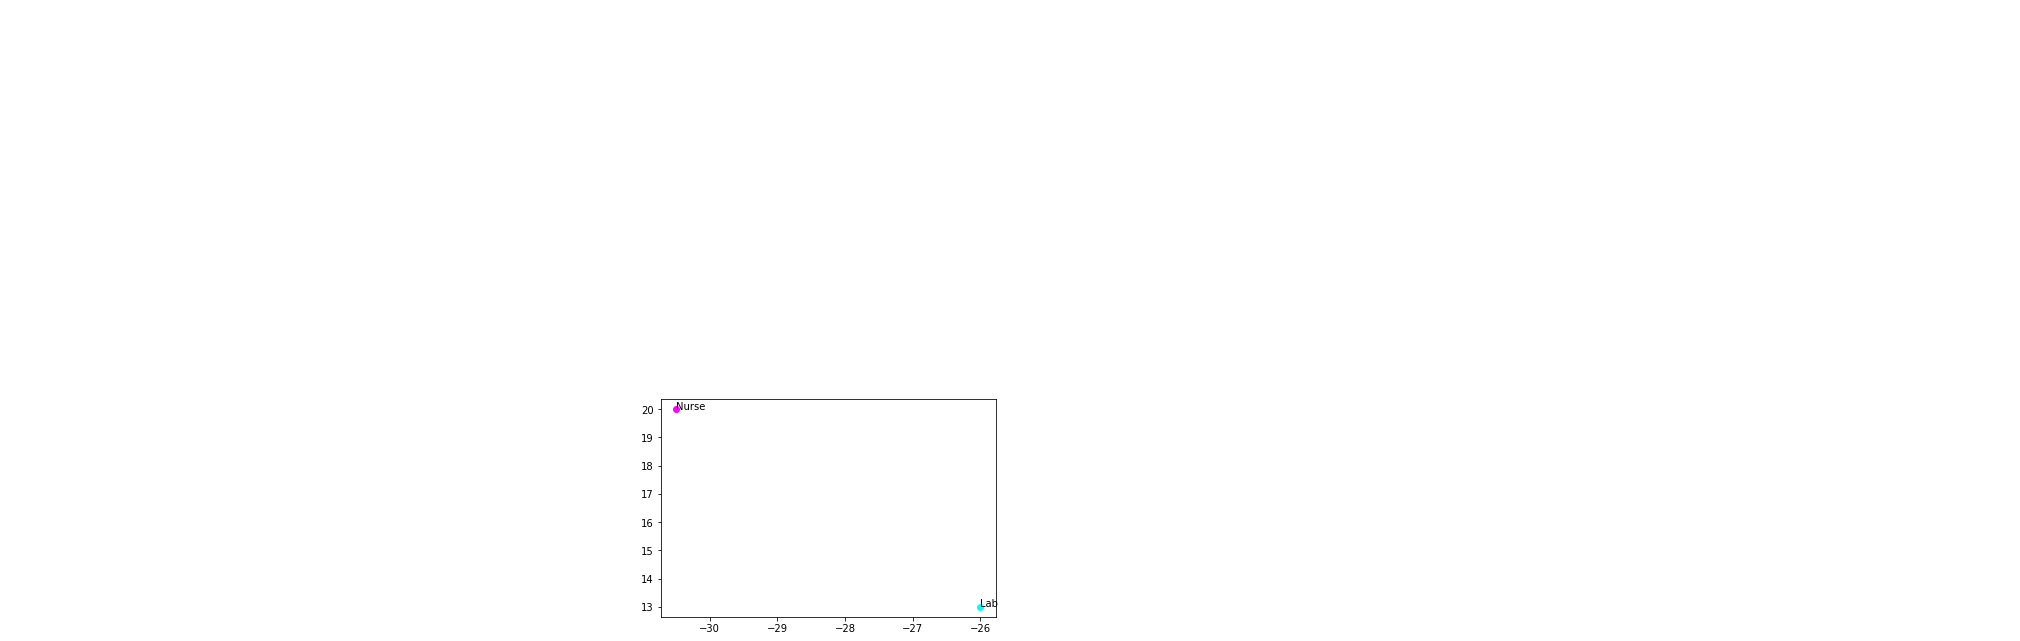

In [71]:
def animate(i):
    c = np.linspace(0, 1, i)
    for j in range(len(positions)):
        ax.plot([x[0] for x in positions[j][:i]], [x[1] for x in positions[j][:i]], 
                f'{colors[robots[j]]}-', zorder=j)
        ax.scatter([x[0] for x in positions[j][:i]], [x[1] for x in positions[j][:i]],
                  c=c, cmap=cmaps[robots[j]], zorder=j+100)
        ax.annotate(robots[j], positions[j][0])
    ax.scatter(lab_position[0], lab_position[1], color="cyan")
    ax.annotate("Lab", (lab_position[0], lab_position[1]))
    ax.scatter(nurse_position[0], nurse_position[1], color="magenta")
    ax.annotate("Nurse", (nurse_position[0], nurse_position[1]))

fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, animate, frames=29)

In [72]:
ani.save('animations/0.mp4', fps=2)

# Final Positions

Text(-30.5, 20.0, 'Nurse')

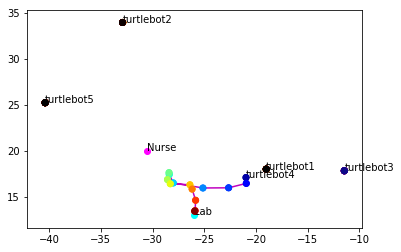

In [70]:
c = np.linspace(0, 1, 28)
for j in range(len(positions)):
    plt.plot([x[0] for x in positions[j]], [x[1] for x in positions[j]], 
            f'{colors[robots[j]]}-', zorder=j)
    plt.scatter([x[0] for x in positions[j]], [x[1] for x in positions[j]],
               c=c, cmap=cmaps[robots[j]], zorder=j+100)
    plt.annotate(robots[j], positions[j][0])
plt.scatter(lab_position[0], lab_position[1], color="cyan")
plt.annotate("Lab", (lab_position[0], lab_position[1]))
plt.scatter(nurse_position[0], nurse_position[1], color="magenta")
plt.annotate("Nurse", (nurse_position[0], nurse_position[1]))